In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [2]:
ccpp = pd.read_excel('ccpp.xlsx')
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


EDA

In [4]:
ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
ccpp.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

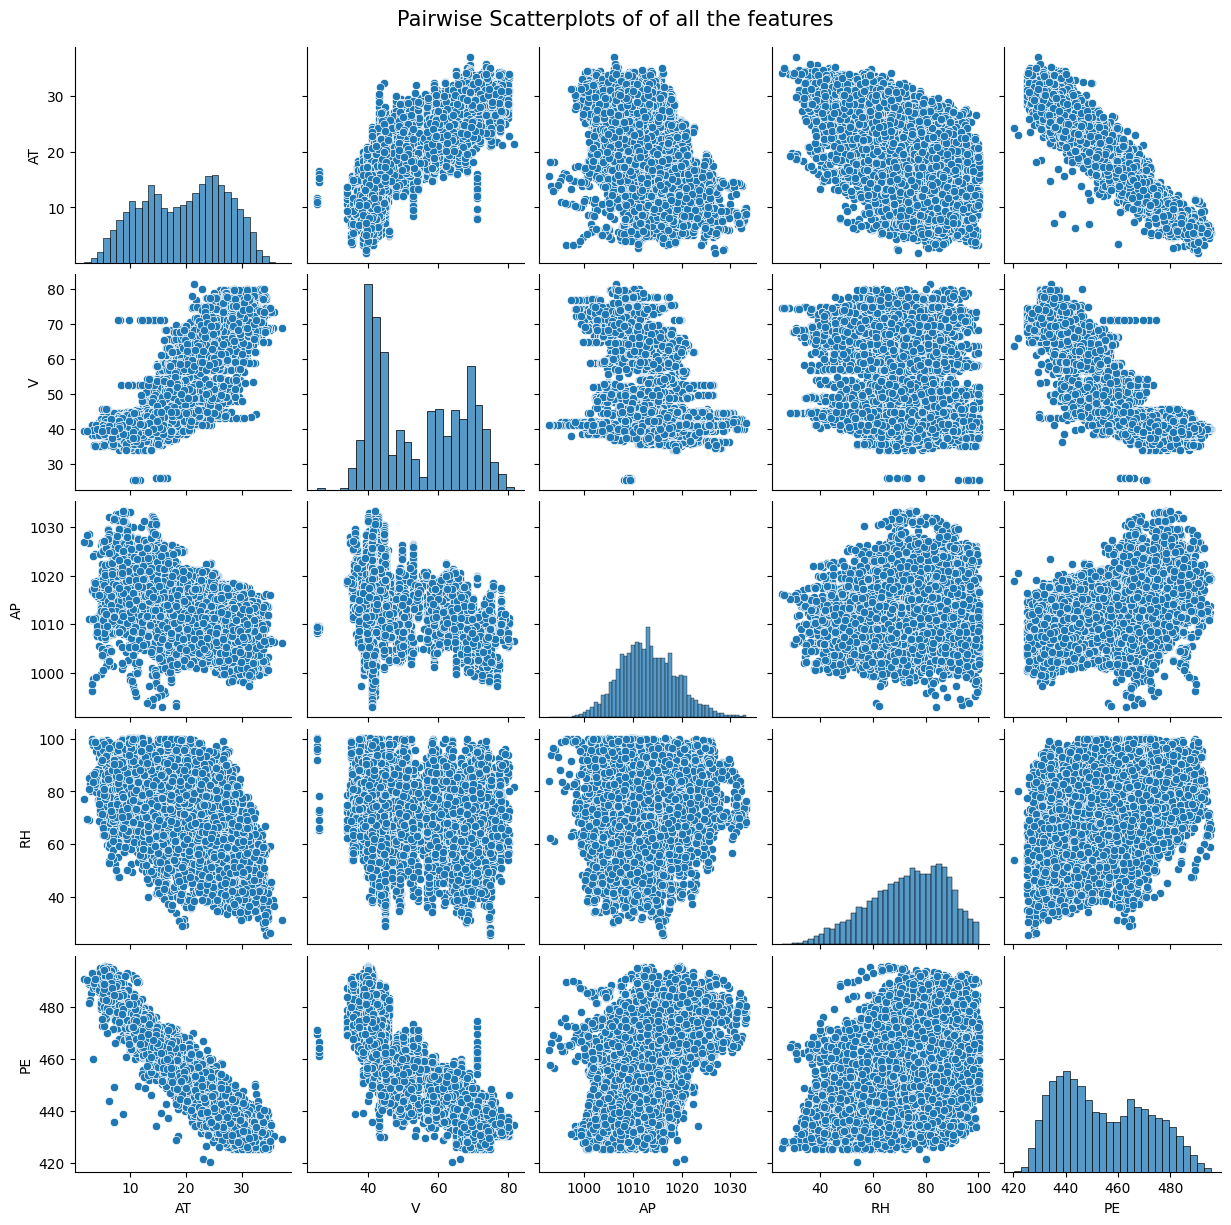

In [ ]:
scatterplots = sns.pairplot(ccpp)
plt.subplots_adjust(top=0.95)
scatterplots.figure.suptitle('Pairwise Scatterplots of of all the features', fontsize=15)
plt.show()

In [9]:
stats = pd.DataFrame()

stats['Mean'] = ccpp.mean()
stats['Median'] = ccpp.median()
stats['Range'] = ccpp.max() - ccpp.min()
stats['First Quartiles'] = ccpp.quantile(0.25)
stats['Third Quartiles'] = ccpp.quantile(0.75)
stats['Interquartile Ranges'] = stats['Third Quartiles'] - stats['First Quartiles']
stats

,Mean,Median,Range,First Quartiles,Third Quartiles,Interquartile Ranges
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


Standardizing the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ccpp_scaled = scaler.fit_transform(ccpp)
ccpp_scaled = pd.DataFrame(ccpp_scaled,columns=['AT', 'V', 'AP', 'RH', 'PE'])
ccpp_scaled.head()

,AT,V,AP,RH,PE
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


Training, Testing split

In [21]:
from sklearn.model_selection import train_test_split

X = ccpp_scaled.drop(columns=['PE'])
y = ccpp['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Applying Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = linear_regression.predict(X_test)

Performance Metrics of Linear Regression model

In [44]:
l_mse = mean_squared_error(y_test, y_pred)
l_r_sqaured = r2_score(y_test, y_pred)
l_mae = mean_absolute_error(y_test, y_pred)
l_rmse = l_mse ** 0.5
print(f"Mean Squared Error = {l_mse}")
print(f"R Squared score = {l_r_sqaured}")
print(f"Mean absolute error = {l_mae}")
print(f"root mean sqaure error = {l_rmse}")

Mean Squared Error = 20.27370599968744
R Squared score = 0.9301046431962188
Mean absolute error = 3.5959131782734084
root mean sqaure error = 4.502633229532186


Applying Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
y_pred = dt_regressor.predict(X_test)

Performance metrics of Decision Tree Regressor model

In [41]:
d_mse = mean_squared_error(y_test, y_pred)
d_r_sqaured = r2_score(y_test, y_pred)
d_mae = mean_absolute_error(y_test, y_pred)
d_rmse = l_mse ** 0.5
print(f"Mean Squared Error: {d_mse}")
print(f"R Squared score = {d_r_sqaured}")
print(f"Mean absolute error = {d_mae}")
print(f"root mean sqaure error = {d_rmse}")

Mean Squared Error: 19.9217526123302
R Squared score = 0.9313180329725139
Mean absolute error = 3.042774294670846
root mean sqaure error = 4.425531628916134


linear regression model has 

Mean Squared Error: 20.27370599968744

R Squared score = 0.9301046431962188

decision tree regressor has

Mean Squared Error: 19.585330198537086

R Squared score = 0.9324778783727194

which one is better?
